In [10]:
import fsspec
import cf_xarray
import xarray as xr
import numpy as np

ds = xr.open_dataset('./nos.wcofs.2ds.f013.20240319.t03z.nc', backend_kwargs={'decode_times': False})
ds

<xarray.Dataset>
Dimensions:        (tracer: 2, boundary: 4, s_rho: 40, s_w: 41, eta_rho: 1016,
                    xi_rho: 348, eta_u: 1016, xi_u: 347, eta_v: 1015,
                    xi_v: 348, eta_psi: 1015, xi_psi: 347, ocean_time: 1)
Coordinates:
  * s_rho          (s_rho) float64 -0.9875 -0.9625 -0.9375 ... -0.0375 -0.0125
  * s_w            (s_w) float64 -1.0 -0.975 -0.95 -0.925 ... -0.05 -0.025 0.0
    lon_rho        (eta_rho, xi_rho) float64 ...
    lat_rho        (eta_rho, xi_rho) float64 ...
    lon_u          (eta_u, xi_u) float64 ...
    lat_u          (eta_u, xi_u) float64 ...
    lon_v          (eta_v, xi_v) float64 ...
    lat_v          (eta_v, xi_v) float64 ...
    lon_psi        (eta_psi, xi_psi) float64 ...
    lat_psi        (eta_psi, xi_psi) float64 ...
  * ocean_time     (ocean_time) float64 2.593e+08
Dimensions without coordinates: tracer, boundary, eta_rho, xi_rho, eta_u, xi_u,
                                eta_v, xi_v, eta_psi, xi_psi
Data variables: (12/90)
    ntimes         int32 ...
    ndtfast        int32 ...
    dt             float64 ...
    dtfast         float64 ...
    dstart         float64 ...
    nHIS           int32 ...
    ...             ...
    Tair           (ocean_time, eta_rho, xi_rho) float32 ...
    rain           (ocean_time, eta_rho, xi_rho) float32 ...
    EminusP        (ocean_time, eta_rho, xi_rho) float32 ...
    swrad          (ocean_time, eta_rho, xi_rho) float32 ...
    sustr          (ocean_time, eta_u, xi_u) float32 ...
    svstr          (ocean_time, eta_v, xi_v) float32 ...
Attributes: (12/36)
    file:              nos.wcofs.surface.forecast.20240319.t03z_0014.nc
    format:            netCDF-3 64bit offset file
    Conventions:       CF-1.4, SGRID-0.3
    type:              ROMS/TOMS quicksave file
    title:             wcofs forecast RUN in operational mode
    var_info:          varinfo.yaml
    ...                ...
    compiler_command:  /opt/cray/pe/craype/2.7.10/bin/ftn
    compiler_flags:    -fp-model precise -ip -O3
    tiling:            008x060
    history:           ROMS/TOMS, Version 4.1, Tuesday - March 19, 2024 -  3:...
    ana_file:          ROMS/Functionals/ana_btflux.h
    CPP_options:       mode, ADD_FSOBC, ADD_M2OBC, ANA_BSFLUX, ANA_BTFLUX, AS...

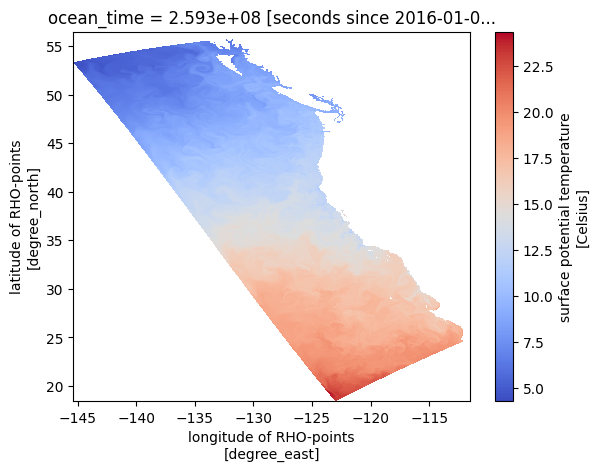

In [11]:
ds.temp_sur.isel(ocean_time=0).plot(x='lon_rho', y='lat_rho', cmap='coolwarm')

In [24]:
# open dataset as zarr object using fsspec reference file system and xarray
fs = fsspec.filesystem("reference", fo='s3://nextgen-dmac-cloud-ingest/nos/wcofs/nos.wcofs.2ds.f013.20240319.t03z.nc.zarr', remote_protocol='s3', remote_options={'anon':True}, target_protocol='s3', target_options={'anon':True})
m = fs.get_mapper("") 

ds_kerchunk = xr.open_dataset(m, engine="zarr", backend_kwargs=dict(consolidated=False), 
                      chunks={})
ds_kerchunk

<xarray.Dataset>
Dimensions:        (tracer: 2, s_rho: 40, s_w: 41, ocean_time: 1,
                    eta_rho: 1016, xi_rho: 348, boundary: 4, eta_psi: 1015,
                    xi_psi: 347, eta_u: 1016, xi_u: 347, eta_v: 1015, xi_v: 348)
Coordinates:
    lat_psi        (eta_psi, xi_psi) float64 dask.array<chunksize=(1015, 347), meta=np.ndarray>
    lat_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(1016, 348), meta=np.ndarray>
    lat_u          (eta_u, xi_u) float64 dask.array<chunksize=(1016, 347), meta=np.ndarray>
    lat_v          (eta_v, xi_v) float64 dask.array<chunksize=(1015, 348), meta=np.ndarray>
    lon_psi        (eta_psi, xi_psi) float64 dask.array<chunksize=(1015, 347), meta=np.ndarray>
    lon_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(1016, 348), meta=np.ndarray>
    lon_u          (eta_u, xi_u) float64 dask.array<chunksize=(1016, 347), meta=np.ndarray>
    lon_v          (eta_v, xi_v) float64 dask.array<chunksize=(1015, 348), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 2024-03-19T16:00:00
  * s_rho          (s_rho) float64 -0.9875 -0.9625 -0.9375 ... -0.0375 -0.0125
  * s_w            (s_w) float64 -1.0 -0.975 -0.95 -0.925 ... -0.05 -0.025 0.0
Dimensions without coordinates: tracer, eta_rho, xi_rho, boundary, eta_psi,
                                xi_psi, eta_u, xi_u, eta_v, xi_v
Data variables: (12/90)
    Akk_bak        float64 ...
    Akp_bak        float64 ...
    Akt_bak        (tracer) float64 dask.array<chunksize=(2,), meta=np.ndarray>
    Akv_bak        float64 ...
    Cs_r           (s_rho) float64 dask.array<chunksize=(40,), meta=np.ndarray>
    Cs_w           (s_w) float64 dask.array<chunksize=(41,), meta=np.ndarray>
    ...             ...
    theta_b        float64 ...
    theta_s        float64 ...
    u_sur          (ocean_time, eta_u, xi_u) float32 dask.array<chunksize=(1, 1016, 347), meta=np.ndarray>
    v_sur          (ocean_time, eta_v, xi_v) float32 dask.array<chunksize=(1, 1015, 348), meta=np.ndarray>
    xl             float64 ...
    zeta           (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 1016, 348), meta=np.ndarray>
Attributes: (12/36)
    CPP_options:       mode, ADD_FSOBC, ADD_M2OBC, ANA_BSFLUX, ANA_BTFLUX, AS...
    Conventions:       CF-1.4, SGRID-0.3
    NLM_LBC:           \nEDGE:  WEST   SOUTH  EAST   NORTH  \nzeta:  Cha    C...
    NLM_TADV:          \nADVECTION:   HORIZONTAL   VERTICAL     \ntemp:      ...
    ana_file:          ROMS/Functionals/ana_btflux.h
    avg_file:          nos.wcofs.avg.nc
    ...                ...
    svn_url:           
    tide_file:         nos.wcofs.roms.tides.nc
    tiling:            008x060
    title:             wcofs forecast RUN in operational mode
    type:              ROMS/TOMS quicksave file
    var_info:          varinfo.yaml

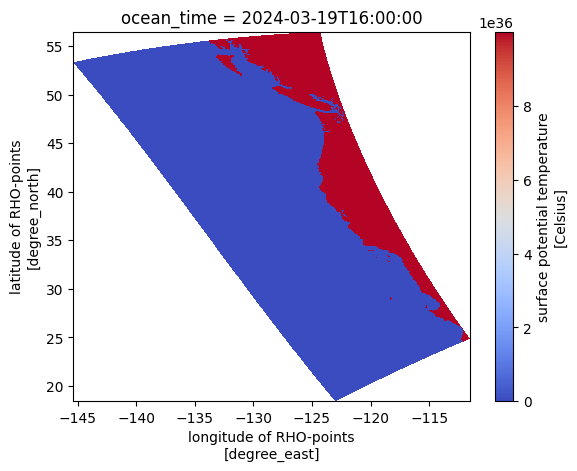

In [25]:
ds_kerchunk.temp_sur.isel(ocean_time=0).plot(x='lon_rho', y='lat_rho', cmap='coolwarm')